# Imported Library

In [51]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
from termcolor import colored

from sklearn.dummy import DummyClassifier 
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, f1_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve
from sklearn.model_selection import StratifiedKFold
from functools import partial
from hyperopt import hp
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
plt.rcParams['figure.figsize']=(12,4)
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from ml_metrics import rmsle


from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ls

In [4]:
cd input

C:\Users\benia\Desktop\Machine_Learning\Prediction value property\input


# Import Data

In [5]:
df = pd.read_hdf("property_polish.h5")

In [6]:
df.head()

,building,extra_benefits,parking,apartament,offer,surroundings,extra_description,benefit_investment,broker_license,stats,...,location,finishing,bathroom,apartament_fix,price,y_pred_price_mean,price_m2,y_pred_price_m2_mean_area,price_log,price_log_m2
0,"{'Typ budynku': 'apartamentowiec', 'Liczba pię...",NaN,NaN,"{'Liczba pokoi': 'parter', 'Kuchnia': 'do wyko...",268 300 zł (7 884 zł/m,{'Zdrowie': [' ...,[Wyjątkowa inwestycja zlokalizowana na warszaw...,NaN,Nr licencji pośrednika: 7820,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,-1,-1,-1,"{'Liczba pokoi': '1', 'Kuchnia': 'oddzielna', ...",268300.0,688142.59123,7884.219806,2.892566e+05,12.499861,0.367319
0,"{'Typ budynku': 'dom wielorodzinny', 'Liczba p...",NaN,NaN,"{'Liczba pokoi': '1', 'Stan łazienki': 'oddzie...",1 188 000 zł (8 609 zł/m,{'Zdrowie': [' ...,"[Bardzo ładne, ciepłe mieszkanie w świeżo zbud...",NaN,Nr licencji pośrednika: 18802,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,"północno-zachodnie, południowo-wschodnie",-1,-1,"{'Liczba pokoi': '4', 'Stan łazienki': 'dobry'...",1188000.0,688142.59123,8608.695652,1.173007e+06,13.987782,0.101361
0,"{'Typ budynku': 'apartamentowiec', 'Liczba pię...","telefon, internet, TV kablowa, winda, ogrzewan...",garaż,"{'Liczba pokoi': '4', 'Forma własności': 'włas...",2 990 000 zł (14 238 zł/m,{},"[| , \nPrzestronny, bardzo słoneczny, cichy, j...",NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,-1,-1,-1,"{'Liczba pokoi': '6', 'Forma własności': 'włas...",2990000.0,688142.59123,14238.095238,1.785010e+06,14.910784,0.071004
0,"{'Typ budynku': 'apartamentowiec', 'Liczba pię...",winda,"garaż, parking podziemny","{'Liczba pokoi': '6', 'Kuchnia': 'do wykończen...",979 862 zł (16 900 zł/m,{'Zdrowie': [' ...,[Ścisłe centrum stolicy osłonięte od zgiełku m...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,-1,-1,-1,"{'Liczba pokoi': '2', 'Kuchnia': 'w aneksie', ...",979862.0,688142.59123,16900.000000,4.928328e+05,13.795167,0.237930
0,"{'Liczba pięter': '4', 'Rok budowy': '1936', '...",NaN,NaN,"{'Forma własności': 'własność', 'Powierzchnia'...",375 000 zł (13 889 zł/m,{'Zdrowie': [' ...,"[KAMIENICA PO REMONCIE W 2014 ROKU, \nMIESZKAN...",NaN,Nr licencji pośrednika: 6315,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,-1,-1,-1,"{'Forma własności': 'własność', 'Powierzchnia'...",375000.0,688142.59123,13888.888889,2.295013e+05,12.834681,0.475359


In [36]:
def get_value(items, key, type_value=np.int8, filter_=None):
    try:
        value = filter_(items[key]) if filter_ else items[key]
        return type_value(value)
    except:
        #print(items)
        return -1
    
def num_filter(val):
    return re.sub('[^0-9]','', val)

def float_filter(val):
    return re.sub('[^0-9\,\.]','', val).replace(',', '.')

def str_filter(val):
    return val.lower().strip()
def get_price(value):
    try:
        if 'nan' == str(value): return np.nan        
        return float(value.split('zł')[0].replace(' ', '').replace(',', '.'))
    except:
        #print(value)
        return -1
def extract_benefits_investment(benefit):
    if 'nan' == str(benefit): return
    
    for value in benefit.split(','):
        value = value.lower().strip()
        if '' == value: continue
            
        all_benefits_investment.add(value)
def extract_benefits(benefit):
    if 'nan' == str(benefit): return
    
    for value in benefit.split(','):
        value = value.lower().strip()
        if '' == value: continue
            
        all_benefits.add(value)
        
    

In [9]:
df['building_num_floor'] = df['building'].map(lambda x: get_value(x, 'Liczba pięter', np.int8, num_filter))
df['type_building'] =      df['building'].map(lambda x: get_value(x, 'Typ budynku', np.str, str_filter ))
df['year_building'] =      df['building'].map(lambda x: get_value(x, 'Rok budowy', np.int16, num_filter ))
df['material_building'] =  df['building'].map(lambda x: get_value(x, 'Materiał', np.str, str_filter ))

In [14]:
idx_benefits, labels_benefits = pd.factorize( list(all_benefits) )

for idx_benefit in idx_benefits:
    cat_name = 'benefit_{0}'.format( labels_benefits[idx_benefit].replace(' ', '_') )
    ben_label = labels_benefits[idx_benefit]
    
    df[cat_name] = df['extra_benefits'].map(lambda x: int(ben_label in x) if 'nan' != str(x) else 0 )

In [17]:
df['price'] = df.offer.map(get_price)

In [18]:
orders = {
    'Forma własności': 1,
    'Powierzchnia': 2,
    'Piętro': 3,
    'Liczba pokoi': 4,
    'Liczba poziomów': 5,
    'Wykończenie': 6,
    'Stan mieszkania': 7,
    'Głośność': 8,
    'Kuchnia': 9,
    'Łazienka': 10,
    'Stan łazienki': 11,
    'Stan instalacji': 12,
    'Okna': 13,
    'Usytuowanie wzgl. stron świata': 14,
    'Powierzchnia dodatkowa': 15
}

def get_map_attrs(apartament):
    sorted_attrs = sorted([ (key, orders[key]) for key in apartament.keys()], key=lambda key: key[1])

    map_attrs = {}
    for idx, attr in enumerate(sorted_attrs):
        if attr[0] == 'Forma własności' or attr[0] == 'Powierzchnia': 
            map_attrs[attr[0]] = sorted_attrs[idx][0]
            continue

        if idx + 1 < len(sorted_attrs):
            map_attrs[attr[0]] = sorted_attrs[idx+1][0]
            
    return map_attrs
            
def do_apartament_fix(apartament):
    if 'nan' == str(apartament): return np.nan
    
    map_attrs = get_map_attrs(apartament)
    apartment_fix = {}
    for key in apartament:
        if key not in map_attrs: continue
        apartment_fix[key] = apartament[map_attrs[key]]
            
    return apartment_fix

df['apartament_fix'] = df['apartament'].map(do_apartament_fix)

In [20]:
df['apartament_ownership'] =   df['apartament_fix'].map(lambda x: get_value(x, 'Forma własności', np.str, str_filter))
df['apartament_area'] =        df['apartament_fix'].map(lambda x: get_value(x, 'Powierzchnia', np.float, float_filter))
df['apartament_floor'] =       df['apartament_fix'].map(lambda x: get_value(x, 'Piętro', np.str, str_filter))
df['apartament_num_rooms'] =   df['apartament_fix'].map(lambda x: get_value(x, 'Liczba pokoi', np.int8, num_filter))
df['apartament_num_levels'] =  df['apartament_fix'].map(lambda x: get_value(x, 'Liczba poziomów', np.str, str_filter))
df['apartament_finished'] =    df['apartament_fix'].map(lambda x: get_value(x, 'Wykończenie', np.str, str_filter))
df['apartament_condition'] =   df['apartament_fix'].map(lambda x: get_value(x, 'Stan mieszkania', np.str, str_filter))
df['apartament_noise'] =       df['apartament_fix'].map(lambda x: get_value(x, 'Głośność', np.str, str_filter))
df['apartament_kitchen'] =     df['apartament_fix'].map(lambda x: get_value(x, 'Kuchnia', np.str, str_filter))
df['apartament_bathroom'] =    df['apartament_fix'].map(lambda x: get_value(x, 'Łazienka', np.str, str_filter))
df['apartament_bahtroom_condition'] = df['apartament_fix'].map(lambda x: get_value(x, 'Stan łazienki', np.str, str_filter))
df['apartament_installation_condition'] = df['apartament_fix'].map(lambda x: get_value(x, 'Stan instalacji', np.str, str_filter))
df['apartament_window'] = df['apartament_fix'].map(lambda x: get_value(x, 'Okna', np.str, str_filter))
df['apartament_appartament'] = df['apartament_fix'].map(lambda x: get_value(x, 'Usytuowanie wzgl. stron świata', np.str, str_filter))

In [38]:
df['stats_who'] =           df.stats.map(lambda x: str(x[0][1].lower().strip()) if x else 'unknown')
df['stats_market'] =        df.stats.map(lambda x: x[1][1].lower().strip() if x else 'unknown')
df['stats_created_at'] =    df.stats.map(lambda x: x[2][1].lower().strip() if x else 'unknown')
df['stats_updated_at'] =    df.stats.map(lambda x: x[3][1].lower().strip() if x else 'unknown')
df['stats_viewers'] =       df.stats.map(lambda x: int(x[4][1].lower().strip()) if x and len(x) == 5 else -1)

In [40]:
if 'building' in         df: del df['building']
if 'extra_benefits' in   df: del df['extra_benefits']
if 'apartament' in       df: del df['apartament']
if 'offer' in            df: del df['offer']
if 'stats' in            df: del df['stats']

In [42]:
df.to_hdf('new_data_prediction_property.h5', 'data') 

C:\Users\benia\Anaconda3\lib\site-packages\pandas\core\generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['parking', 'surroundings', 'extra_description', 'benefit_investment',
       'broker_license', 'name', 'type_building', 'ownership', 'loudness',
       'kitchen', 'windows', 'installations', 'condition_general',
       'condition_bathroom', 'location', 'finishing', 'bathroom',
       'apartament_fix', 'material_building', 'apartament_ownership',
       'apartament_floor', 'apartament_num_levels', 'apartament_finished',
       'apartament_condition', 'apartament_noise', 'apartament_kitchen',
       'apartament_bathroom', 'apartament_bahtroom_condition',
       'apartament_installation_condition', 'apartament_window',
       'apartament_appartament', 'stats_who', 'stats_market',
       'stats_created_at', 'stats_updated_at'],
    

In [46]:
df.head()

,parking,surroundings,extra_description,benefit_investment,broker_license,broker_id,broker_company_id,bulding_floors,name,year_building,...,apartament_bathroom,apartament_bahtroom_condition,apartament_installation_condition,apartament_window,apartament_appartament,stats_who,stats_market,stats_created_at,stats_updated_at,stats_viewers
0,NaN,{'Zdrowie': [' ...,[Wyjątkowa inwestycja zlokalizowana na warszaw...,NaN,Nr licencji pośrednika: 7820,437,181,4,-1,-1,...,-1,-1,-1,-1,-1,biuro nieruchomości,wtórny,więcej niż miesiąc temu,więcej niż miesiąc temu,115
0,NaN,{'Zdrowie': [' ...,"[Bardzo ładne, ciepłe mieszkanie w świeżo zbud...",NaN,Nr licencji pośrednika: 18802,111,154,2,-1,-1,...,-1,dobry,nowa,nowe drewniane,"północno-zachodnie, południowo-wschodnie",biuro nieruchomości,wtórny,więcej niż miesiąc temu,wczoraj,185
0,garaż,{},"[| , \nPrzestronny, bardzo słoneczny, cichy, j...",NaN,,369,176,4,-1,-1,...,-1,-1,-1,nowe plastikowe,-1,biuro nieruchomości,wtórny,więcej niż miesiąc temu,więcej niż miesiąc temu,860
0,"garaż, parking podziemny",{'Zdrowie': [' ...,[Ścisłe centrum stolicy osłonięte od zgiełku m...,NaN,,217,6,8,-1,-1,...,-1,-1,-1,-1,-1,biuro nieruchomości,wtórny,więcej niż miesiąc temu,w tym miesiącu,34
0,NaN,{'Zdrowie': [' ...,"[KAMIENICA PO REMONCIE W 2014 ROKU, \nMIESZKAN...",NaN,Nr licencji pośrednika: 6315,5,4,4,-1,-1,...,-1,-1,-1,-1,-1,biuro nieruchomości,wtórny,więcej niż miesiąc temu,więcej niż miesiąc temu,84


<Figure size 36000x1440 with 0 Axes>

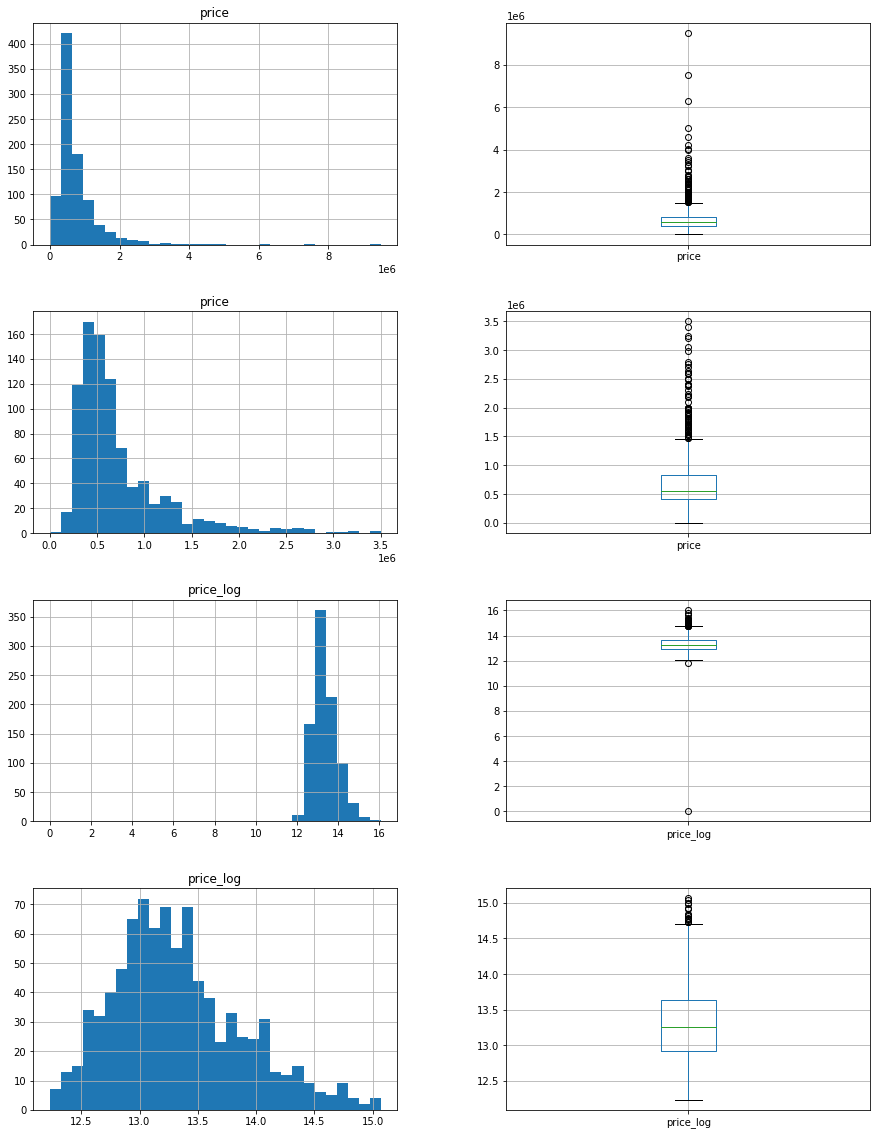

In [47]:
df['price_log'] = np.log( df['price'] )

plt.figure(figsize=(500,20))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15, 20))
fig.subplots_adjust(hspace=.8)

def sub_plot(data, column, ax1, ax2):
    data.hist(column, bins=30, ax=ax1)
    data.boxplot(column, ax=ax2)

sub_plot(df, 'price', ax1, ax2)
sub_plot(df[ df.price < np.percentile( df.price, 99 ) ], 'price', ax3, ax4)
sub_plot(df, 'price_log', ax5, ax6)
sub_plot(df[ (df.price_log > np.percentile( df.price_log, 1 )) & (df.price_log < np.percentile( df.price_log, 99 )) ], 'price_log', ax7, ax8)

In [52]:
X = df[ ['year_building'] ].values
y = df['price'].values

model = DummyRegressor()

cv = KFold(n_splits=4)

scores = []
for train_idx, test_idx in cv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = rmsle(y_test, y_pred)
    scores.append( score )
    
    
print(np.mean(scores), np.std(scores))

0.7403060076649002 0.19749887935586083


In [56]:
def get_feats(df):
    feats = df.select_dtypes(include=[np.int, np.float]).columns 
    return feats[ (feats != 'price') & (feats != 'price_log') ].values

def get_X(df):
    return df[ get_feats(df) ].values

def get_y(df, target_var='price'):
    return df[target_var].values

def get_models():
    return [
        ('dummy_mean', DummyRegressor(strategy='mean')),
        ('dummy_median', DummyRegressor(strategy='median'))
    ]

def run_cv(model, X, y, folds=4, target_log=False,cv_type=KFold, success_metric=rmsle):
    cv = cv_type(n_splits=folds)
    
    scores = []
    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        if target_log:
            y_train = np.log(y_train)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if target_log:
            y_pred = np.exp(y_pred)
            y_pred[y_pred < 0] = 0 #czasem może być wartość ujemna

        score = success_metric(y_test, y_pred)
        scores.append( score )
        
    return np.mean(scores), np.std(scores)


def plot_learning_curve(model, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), target_log=False):
    
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    if target_log:
        y = np.log(y)
    
    def my_scorer(model, X, y):
        y_pred = model.predict(X)
        
        if target_log:
            y = np.exp(y)
            y_pred = np.exp(y_pred)
            y_pred[ y_pred<0 ] = 0
        
        return rmsle(y, y_pred)

        
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=my_scorer)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def run(train, plot_lc=False, folds=3, ylim=(0, 2), target_log=False):
    X, y  = get_X(train), get_y(train)

    for model_name, model in get_models():
        score_mean, score_std = run_cv(model, X, y, folds=folds, target_log=target_log)
        print("[{0}]: {1} +/-{2}".format(model_name, score_mean, score_std))
        sys.stdout.flush() 

        if False == plot_lc: continue
        plt = plot_learning_curve(model, model_name, X, y, ylim=ylim, cv=folds, target_log=target_log)
        plt.show()

In [57]:
X,y = get_X(df), get_y(df)

for model_name, model in get_models():
    score_mean, score_std = run_cv(model, X, y)
    print("[{0}]: {1} +/-{2}".format(model_name, score_mean, score_std))

[dummy_mean]: 0.7403060076649002 +/-0.19749887935586083
[dummy_median]: 0.7101556316001499 +/-0.19390686918487307


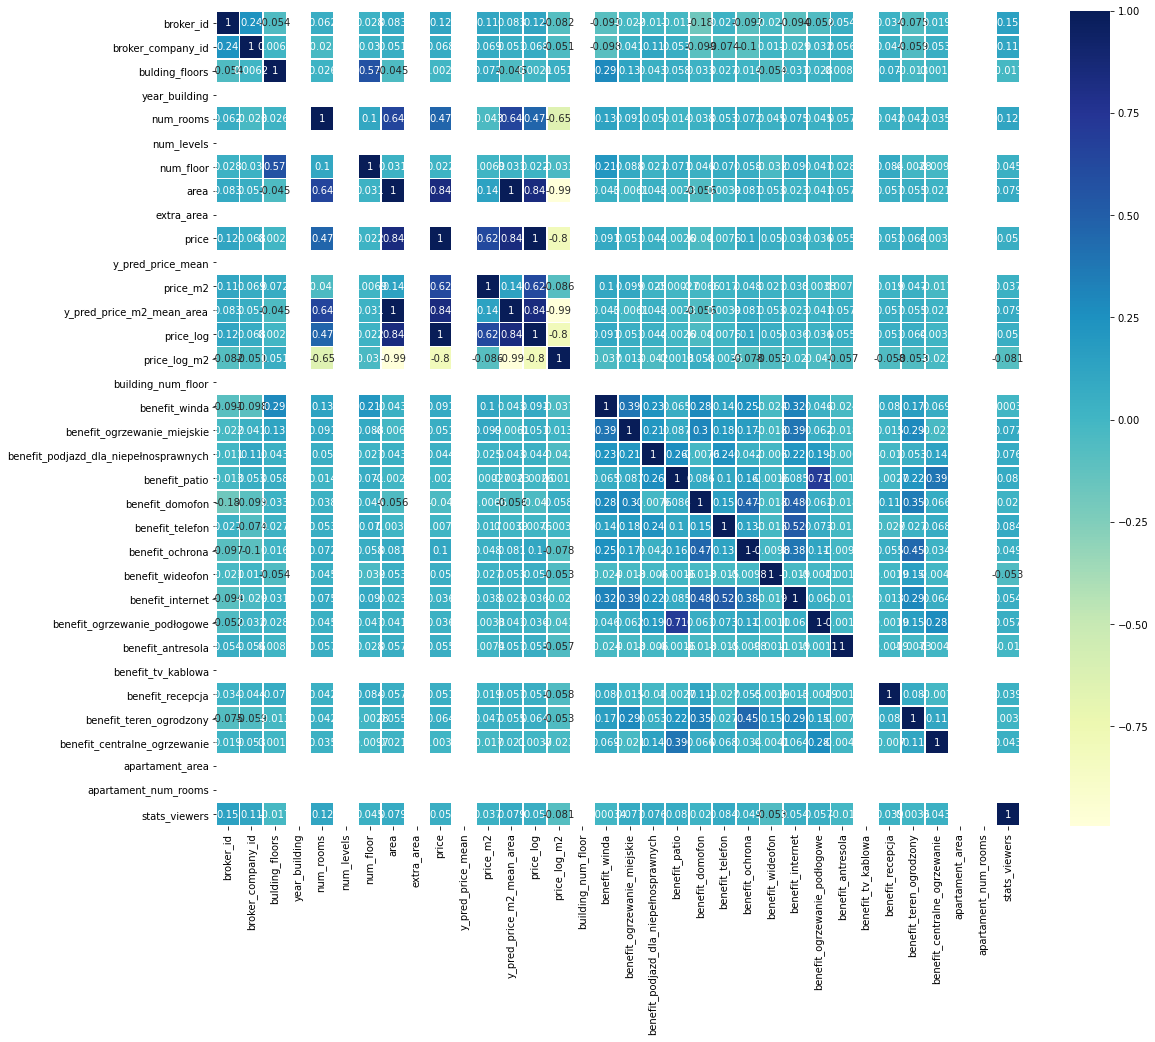

In [58]:
plt.rcParams['figure.figsize']=(18,15)
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.8, cmap="YlGnBu");

In [62]:
get_feats(df)

array(['area', 'y_pred_price_mean', 'price_m2',
       'y_pred_price_m2_mean_area', 'price_log_m2', 'apartament_area_log'],
      dtype=object)

-1    896
Name: building_num_floor, dtype: int64


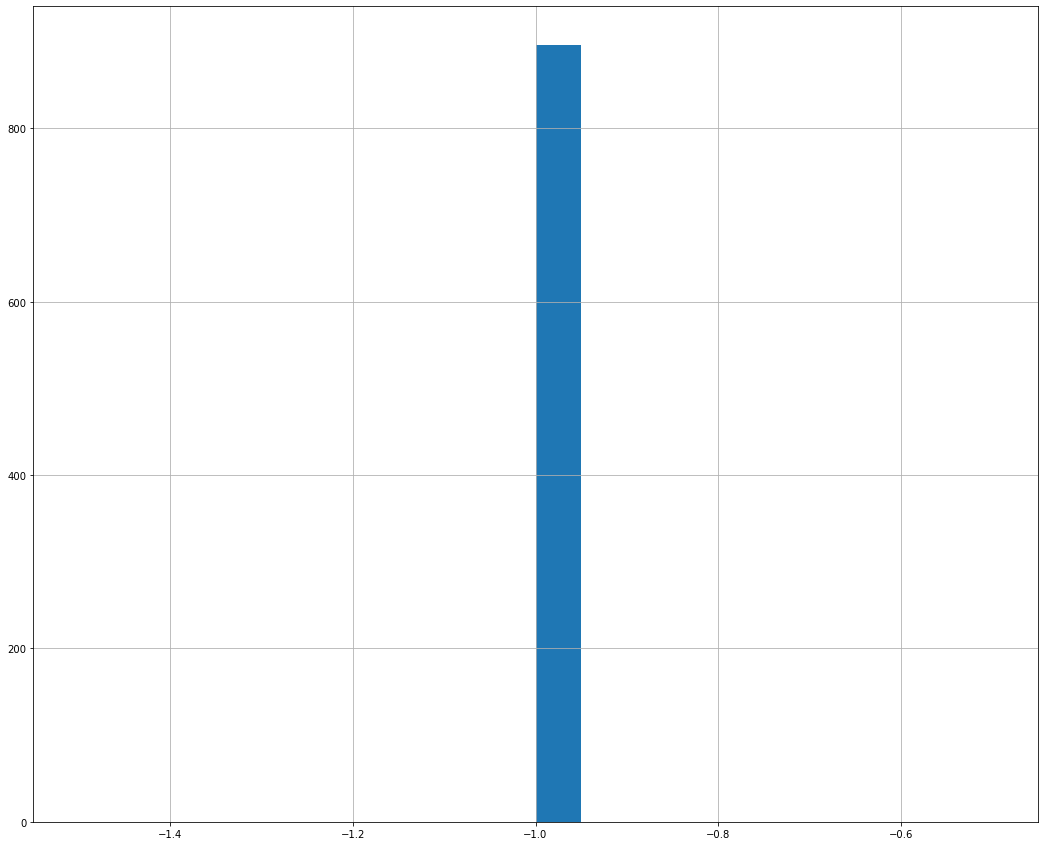

In [63]:
print( df.building_num_floor.value_counts() )
df['building_num_floor'].hist(bins=20)

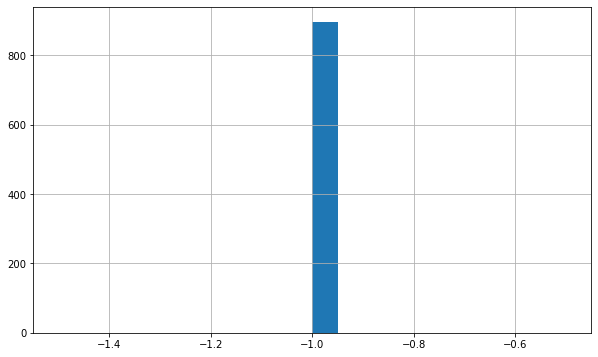

In [64]:
cnt_values = df.building_num_floor.value_counts().reset_index()
other_floor = set(cnt_values[ cnt_values.building_num_floor < 200 ]['index'].values)

df['building_num_floor_other'] = df.building_num_floor.map(lambda x: 0 if x in other_floor else x)
df['building_num_floor_other'].hist(bins=20, figsize=(10, 6))

In [66]:
df_ohe = pd.get_dummies(df['building_num_floor_other'], prefix='building_num_floor')
df_ohe.head()

,building_num_floor_-1
0,1
0,1
0,1
0,1
0,1


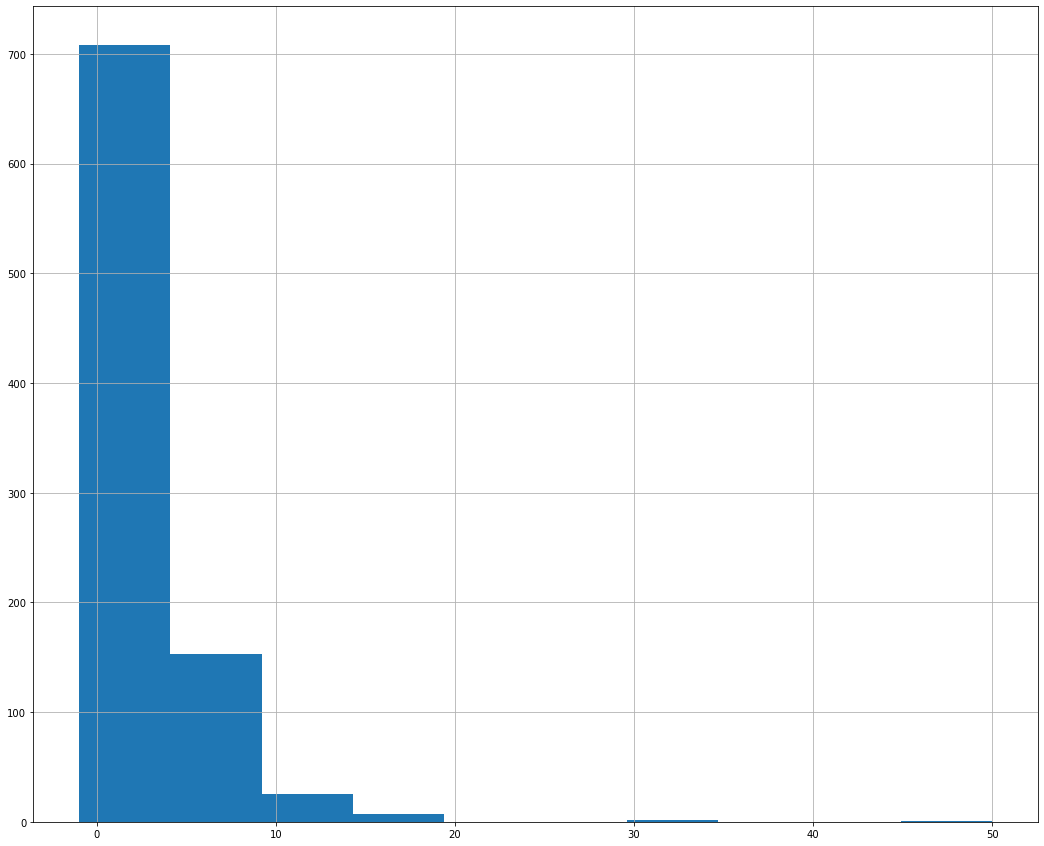

In [67]:
map_floor = {
    'parter': 0,
    'poddasze': 50,
    'powyżej 30': 30
}

df['apartament_floor'] = df.apartament_floor.map(lambda x: map_floor[x] if x in map_floor else int(x)).astype('int8')
df['apartament_floor'].hist()